In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load dataset
data = pd.read_csv('/Users/geoffpoint-du-jour/Downloads/ASO/master_tickets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67539 entries, 0 to 67538
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fiscal_year        67539 non-null  object 
 1   acct_id            67539 non-null  int64  
 2   is_college_pass    67539 non-null  bool   
 3   event_name         67539 non-null  object 
 4   event_date         0 non-null      float64
 5   add_datetime       67539 non-null  object 
 6   days_before_event  0 non-null      float64
 7   section_name       67539 non-null  object 
 8   row_name           67539 non-null  object 
 9   seat_num           67539 non-null  int64  
 10  last_seat          67539 non-null  int64  
 11  num_seats          67539 non-null  int64  
 12  price_code         67539 non-null  object 
 13  price_code_type    67539 non-null  object 
 14  price_section      67539 non-null  object 
 15  purchase_price     67539 non-null  float64
 16  paid_amount        675

In [3]:
print(data.columns)

Index(['fiscal_year', 'acct_id', 'is_college_pass', 'event_name', 'event_date',
       'add_datetime', 'days_before_event', 'section_name', 'row_name',
       'seat_num', 'last_seat', 'num_seats', 'price_code', 'price_code_type',
       'price_section', 'purchase_price', 'paid_amount', 'comp', 'comp_name',
       'source', 'ticket_type', 'age', 'gender', 'marital_status', 'education',
       'zip'],
      dtype='object')


67539


<Axes: xlabel='fiscal_year', ylabel='ticket_type'>

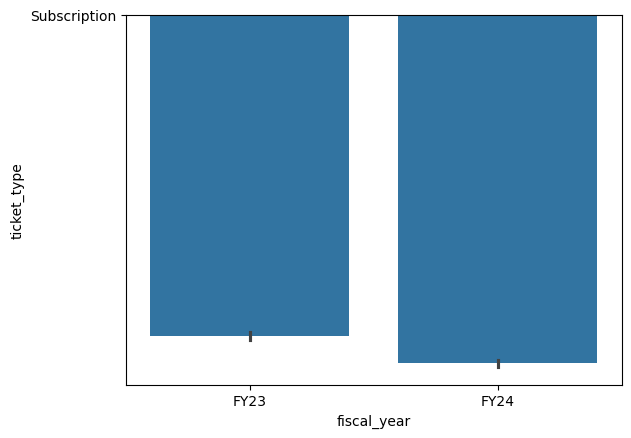

In [4]:
## Number of tickets sold (do pie chart for )
ticketcount =data['purchase_price'].count()
print(ticketcount)

##Number of tickets sold per year 
sns.barplot(data = data, x = "fiscal_year", y=data['ticket_type'])

In [5]:
# Filter to single-ticket purchases
single_tickets = data[data['ticket_type'] == 'Single Ticket']
# Group by event and event date
tickets_by_event_date = (
    single_tickets
    .groupby(['event_name', 'event_date'])
    .size()
    .reset_index(name='num_tickets')
)


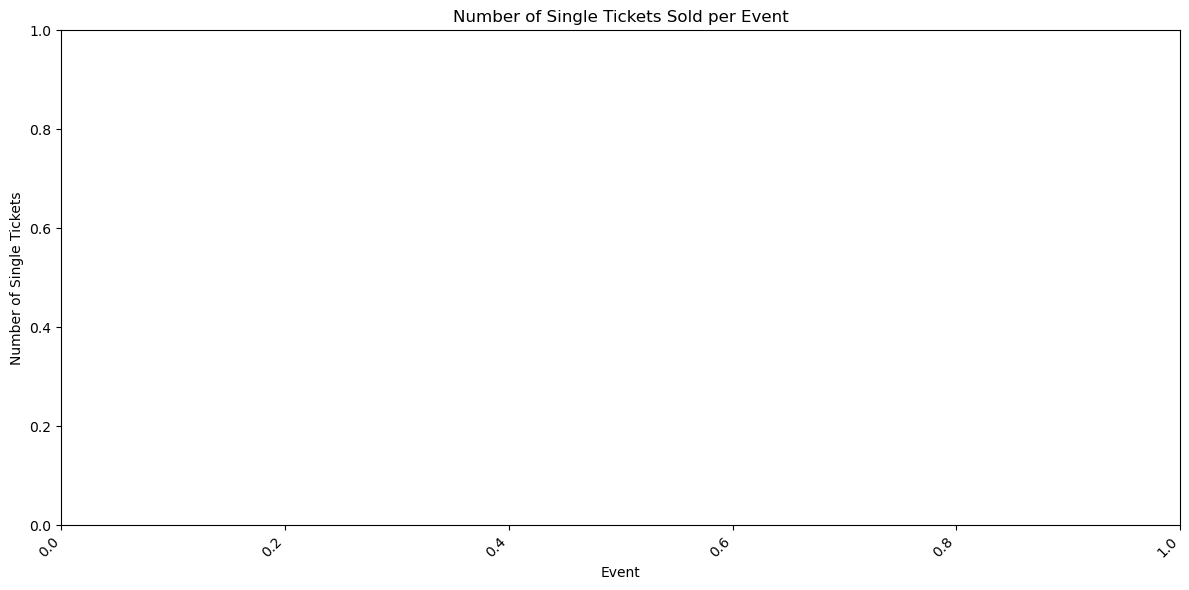

In [6]:
#tickets sold per event  (replace with event date not add_datetime)
plt.figure(figsize=(12,6))
sns.barplot(data=tickets_by_event_date, x='event_name', y='num_tickets', color='skyblue')
plt.title('Number of Single Tickets Sold per Event')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Number of Single Tickets')
plt.tight_layout()
plt.show()


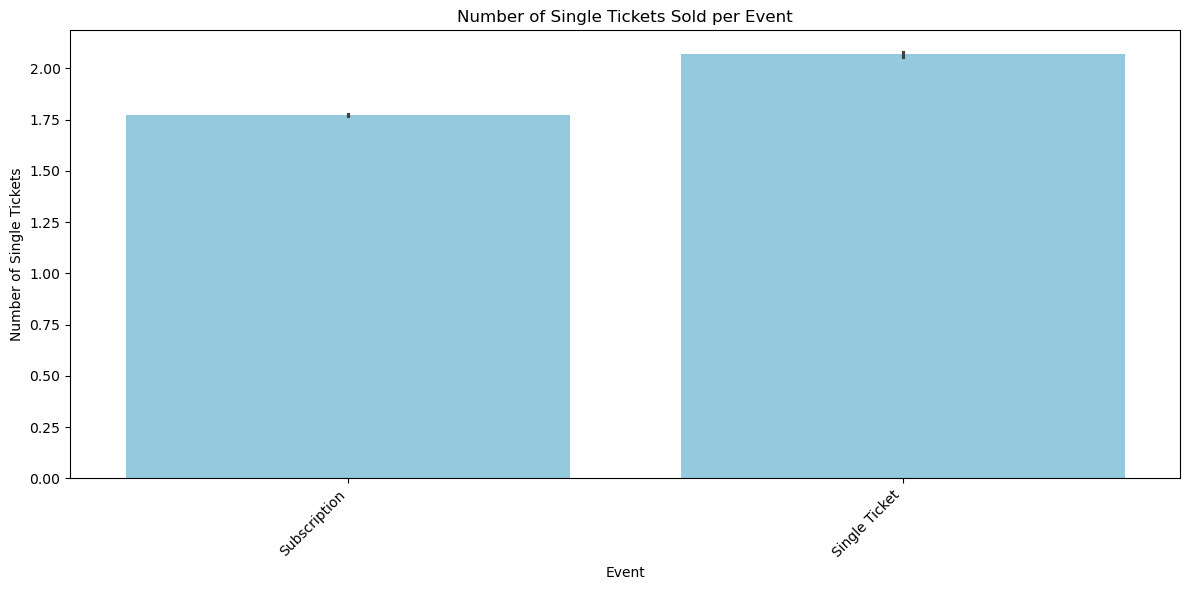

In [7]:
#tickets sold per #  (replace with event date not add_datetime)
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='ticket_type', y='num_seats', color='skyblue')
plt.title('Number of Single Tickets Sold per Event')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Number of Single Tickets')
plt.tight_layout()
plt.show()

In [8]:
# Count how many single-ticket purchases each account made
freq_by_account = (
    single_tickets
    .groupby('acct_id')
    .size()
    .reset_index(name='single_ticket_purchases')
    .sort_values('single_ticket_purchases', ascending=False)
)

freq_by_account.head()


,acct_id,single_ticket_purchases
2375,4137286,260
1594,1465753,206
15468,9335803,35
1942,2810742,29
544,262210,25


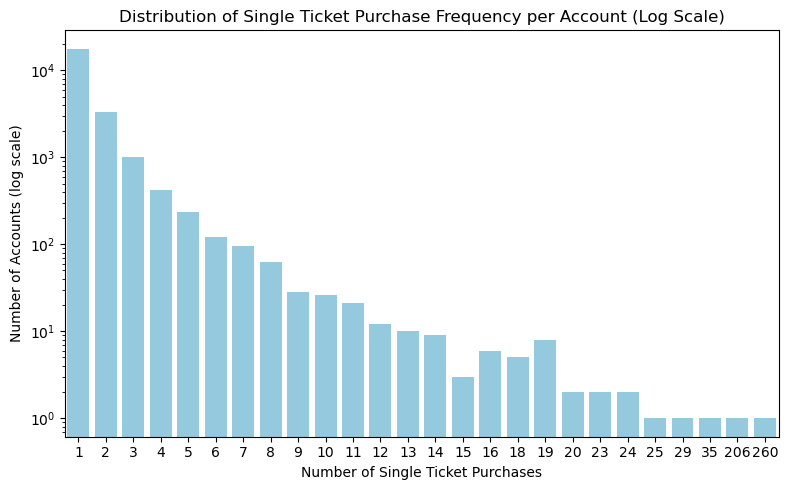

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Frequency table: number of accounts per number of purchases
freq_counts = freq_by_account['single_ticket_purchases'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=freq_counts.index, y=freq_counts.values, color='skyblue')

plt.title('Distribution of Single Ticket Purchase Frequency per Account (Log Scale)')
plt.xlabel('Number of Single Ticket Purchases')
plt.ylabel('Number of Accounts (log scale)')

# Set y-axis to log scale
plt.yscale('log')

plt.tight_layout()
plt.show()


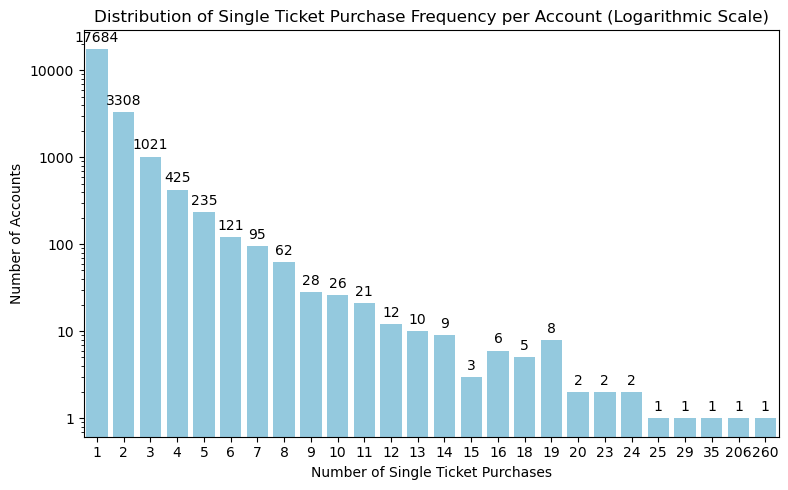

In [18]:
## frequency of single ticket buyers 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Frequency table: number of accounts per number of purchases
freq_counts = freq_by_account['single_ticket_purchases'].value_counts().sort_index()

plt.figure(figsize=(8,5))
bars = sns.barplot(x=freq_counts.index, y=freq_counts.values, color='skyblue')

# Set y-axis to log scale
plt.yscale('log')

# Show original numbers as y-tick labels
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}'))

# Add labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height), 
                  xytext=(0, 3),  # small vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.title('Distribution of Single Ticket Purchase Frequency per Account (Logarithmic Scale)')
plt.xlabel('Number of Single Ticket Purchases')
plt.ylabel('Number of Accounts')
plt.tight_layout()
plt.show()


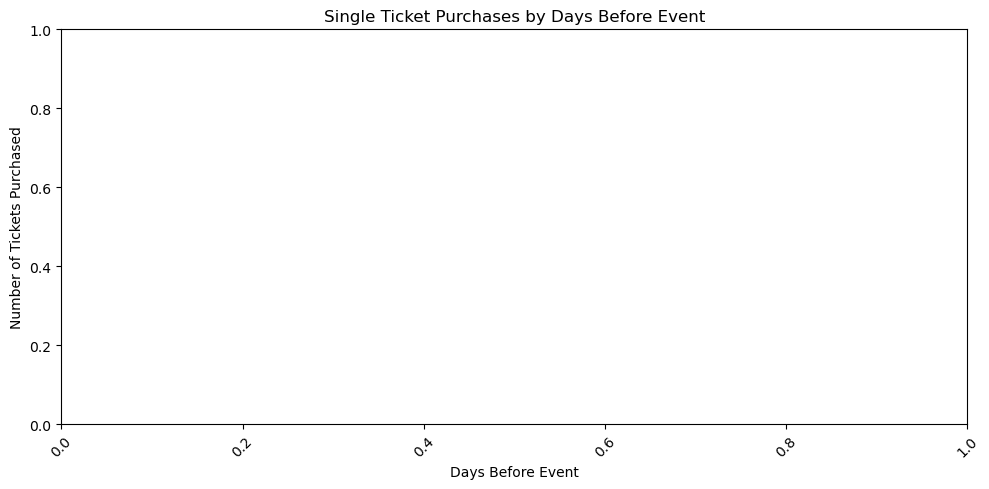

In [23]:

# Filter to single-ticket purchases
single_tickets = data[data['ticket_type'] == 'Single Ticket']

# Count number of purchases per day before event
days_counts = single_tickets['days_before_event'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=days_counts.index, y=days_counts.values, color='skyblue')

plt.title('Single Ticket Purchases by Days Before Event')
plt.xlabel('Days Before Event')
plt.ylabel('Number of Tickets Purchased')

plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.tight_layout()
plt.show()
